# Exercise 13: Linear Regression with Simulated Data

This exercise creates simulated data and fits simple linear regression models to it. We'll use a random number generator with seed set to 1 to ensure consistent results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Set random seed for reproducibility
np.random.seed(1)

## 3. Linear Regression

### (a) Create vector x with 100 observations from N(0,1) distribution

In [2]:
# (a) Using normal() method to create vector x
x = np.random.normal(0, 1, 100)
print(f"Length of x: {len(x)}")
print(f"First 10 values of x: {x[:10]}")
print(f"Mean of x: {np.mean(x):.4f}")
print(f"Standard deviation of x: {np.std(x):.4f}")

Length of x: 100
First 10 values of x: [ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  1.74481176 -0.7612069   0.3190391  -0.24937038]
Mean of x: 0.0606
Standard deviation of x: 0.8852


### (b) Create vector eps with 100 observations from N(0, 0.25) distribution

In [3]:
# (b) Create eps vector from normal distribution with mean=0, variance=0.25 (std=0.5)
eps = np.random.normal(0, 0.5, 100)  # std = sqrt(0.25) = 0.5
print(f"Length of eps: {len(eps)}")
print(f"Mean of eps: {np.mean(eps):.4f}")
print(f"Variance of eps: {np.var(eps):.4f}")
print(f"Standard deviation of eps: {np.std(eps):.4f}")

Length of eps: 100
Mean of eps: 0.0764
Variance of eps: 0.2172
Standard deviation of eps: 0.4660


### (c) Generate vector y according to the model Y = -1 + 0.5X + ε

In [4]:
# (c) Generate y according to Y = -1 + 0.5X + ε
y = -1 + 0.5 * x + eps

print(f"Model: Y = -1 + 0.5X + ε")
print(f"Length of y: {len(y)}")
print(f"β₀ (true intercept): -1")
print(f"β₁ (true slope): 0.5")
print(f"First 10 values of y: {y[:10]}")

Model: Y = -1 + 0.5X + ε
Length of y: 100
β₀ (true intercept): -1
β₁ (true slope): 0.5
First 10 values of y: [-0.4113916  -0.69362435 -1.06234006 -1.23969505 -1.11475211 -2.06607813
  0.24268411 -1.85745375 -0.9735897  -1.10837791]


### (d) Create scatterplot showing relationship between x and y

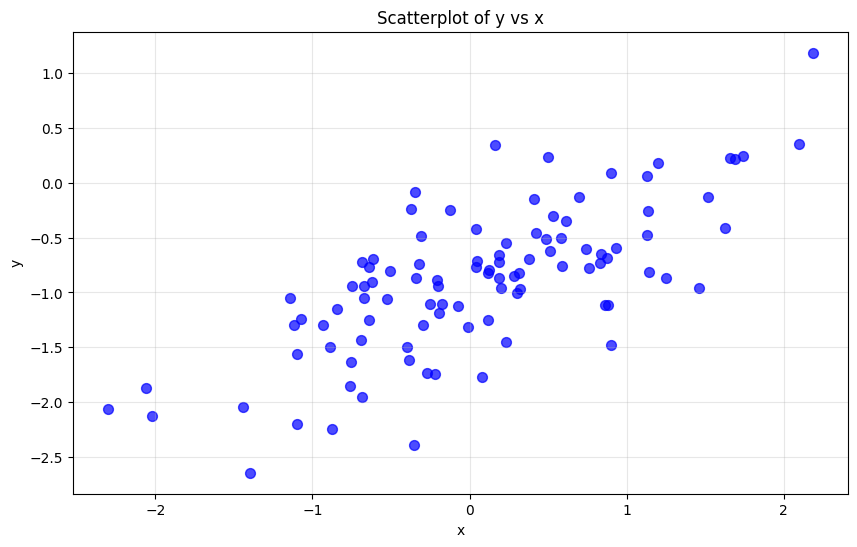

The relationship appears linear with some noise, as expected from our model.


In [5]:
# (d) Create scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.7, color='blue', s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot of y vs x')
plt.grid(True, alpha=0.3)
plt.show()

print(f"The relationship appears linear with some noise, as expected from our model.")

### (e) Fit least squares linear model to predict y using x

In [6]:
# (e) Fit least squares linear model
# Reshape x for sklearn (needs 2D array)
X = x.reshape(-1, 1)

# Create and fit the model
model_linear = LinearRegression()
model_linear.fit(X, y)

# Get coefficients
beta_0_hat = model_linear.intercept_
beta_1_hat = model_linear.coef_[0]

print(f"Fitted Linear Model: ŷ = {beta_0_hat:.4f} + {beta_1_hat:.4f}x")
print(f"True model:         y = -1.0000 + 0.5000x + ε")
print(f"")
print(f"Estimated β₀: {beta_0_hat:.4f} (True: -1.0000)")
print(f"Estimated β₁: {beta_1_hat:.4f} (True: 0.5000)")
print(f"")
print(f"How do β̂₀ and β̂₁ compare to β₀ and β₁?")
print(f"The estimates are very close to the true values, which is expected for least squares.")

Fitted Linear Model: ŷ = -0.9265 + 0.5477x
True model:         y = -1.0000 + 0.5000x + ε

Estimated β₀: -0.9265 (True: -1.0000)
Estimated β₁: 0.5477 (True: 0.5000)

How do β̂₀ and β̂₁ compare to β₀ and β₁?
The estimates are very close to the true values, which is expected for least squares.


### (f) Display least squares line on the scatterplot

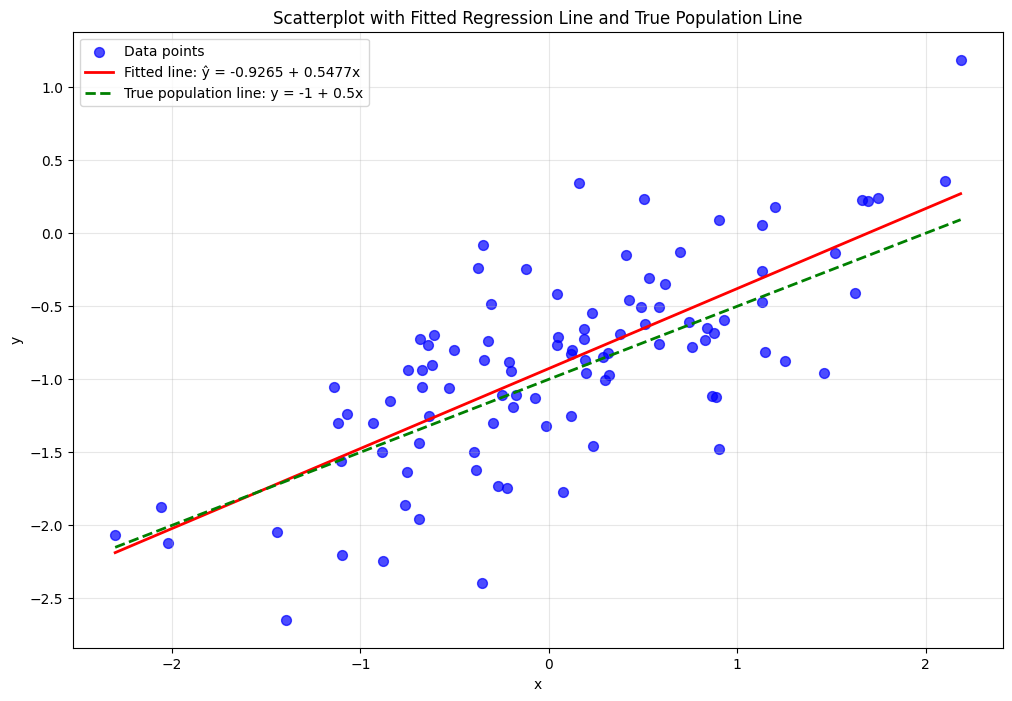

In [7]:
# (f) Display least squares line on scatterplot
plt.figure(figsize=(12, 8))

# Scatterplot
plt.scatter(x, y, alpha=0.7, color='blue', s=50, label='Data points')

# Fitted line
x_range = np.linspace(x.min(), x.max(), 100)
y_fitted = model_linear.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_fitted, 'r-', linewidth=2, label=f'Fitted line: ŷ = {beta_0_hat:.4f} + {beta_1_hat:.4f}x')

# Population regression line (true model without noise)
y_true = -1 + 0.5 * x_range
plt.plot(x_range, y_true, 'g--', linewidth=2, label='True population line: y = -1 + 0.5x')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot with Fitted Regression Line and True Population Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### (g) Fit polynomial regression model to predict y using x and x²

In [8]:
# (g) Fit polynomial regression model with x and x²
# Create polynomial features (degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Fit polynomial model
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Get coefficients
beta_0_poly = model_poly.intercept_
beta_1_poly, beta_2_poly = model_poly.coef_

print(f"Polynomial Model: ŷ = {beta_0_poly:.4f} + {beta_1_poly:.4f}x + {beta_2_poly:.4f}x²")
print(f"Linear Model:     ŷ = {beta_0_hat:.4f} + {beta_1_hat:.4f}x")
print(f"True Model:       y = -1.0000 + 0.5000x + ε")
print(f"")
print(f"Is there evidence that the quadratic term improves the model fit?")
print(f"The coefficient for x² is {beta_2_poly:.4f}, which is close to 0.")
print(f"Since the true model is linear, we don't expect a significant quadratic term.")

Polynomial Model: ŷ = -0.9325 + 0.5468x + 0.0077x²
Linear Model:     ŷ = -0.9265 + 0.5477x
True Model:       y = -1.0000 + 0.5000x + ε

Is there evidence that the quadratic term improves the model fit?
The coefficient for x² is 0.0077, which is close to 0.
Since the true model is linear, we don't expect a significant quadratic term.


### (h) Repeat (f) after modifying data generation to have less noise

In [9]:
# (h) Modify data generation with less noise (decrease variance of normal distribution)
np.random.seed(1)  # Reset seed for reproducibility

# Generate new data with less noise (smaller variance)
x_less_noise = np.random.normal(0, 1, 100)
eps_less_noise = np.random.normal(0, 0.1, 100)  # Much smaller std: 0.1 instead of 0.5
y_less_noise = -1 + 0.5 * x_less_noise + eps_less_noise

print(f"Original error variance: {np.var(eps):.4f}")
print(f"Reduced error variance: {np.var(eps_less_noise):.4f}")
print(f"Noise reduction factor: {np.var(eps) / np.var(eps_less_noise):.1f}x less noise")

Original error variance: 0.2172
Reduced error variance: 0.0087
Noise reduction factor: 25.0x less noise


In [10]:
# Fit models to less noisy data
X_less_noise = x_less_noise.reshape(-1, 1)

# Linear model
model_linear_less = LinearRegression()
model_linear_less.fit(X_less_noise, y_less_noise)

# Polynomial model
X_poly_less = poly_features.fit_transform(X_less_noise)
model_poly_less = LinearRegression()
model_poly_less.fit(X_poly_less, y_less_noise)

# Compare results
print(f"Less Noisy Data Results:")
print(f"Linear model:     ŷ = {model_linear_less.intercept_:.4f} + {model_linear_less.coef_[0]:.4f}x")
print(f"Polynomial model: ŷ = {model_poly_less.intercept_:.4f} + {model_poly_less.coef_[0]:.4f}x + {model_poly_less.coef_[1]:.4f}x²")
print(f"True model:       y = -1.0000 + 0.5000x + ε")
print(f"")
print(f"The model should remain the same since the underlying relationship is still linear.")
print(f"However, estimates should be more accurate due to less noise.")

Less Noisy Data Results:
Linear model:     ŷ = -0.9853 + 0.5095x
Polynomial model: ŷ = -0.9865 + 0.5094x + 0.0015x²
True model:       y = -1.0000 + 0.5000x + ε

The model should remain the same since the underlying relationship is still linear.
However, estimates should be more accurate due to less noise.


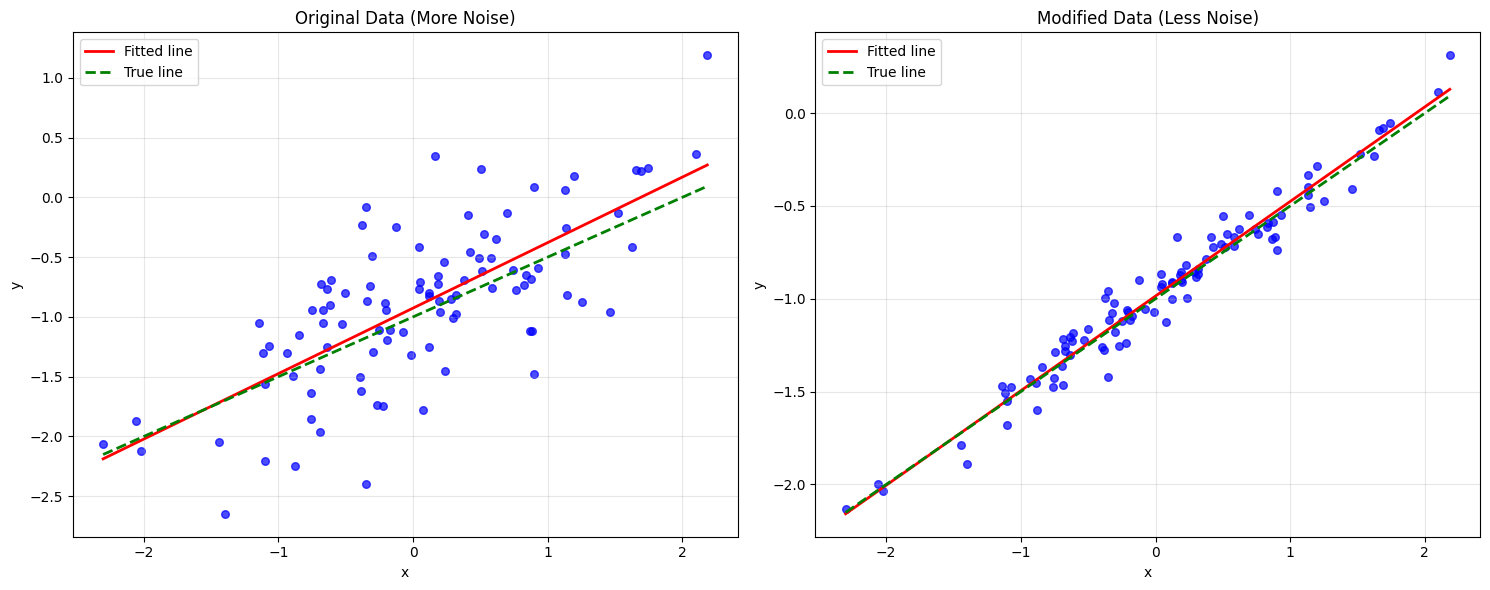

In [11]:
# Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Original noisy data
ax1.scatter(x, y, alpha=0.7, color='blue', s=30)
x_range = np.linspace(min(x.min(), x_less_noise.min()), max(x.max(), x_less_noise.max()), 100)
y_fitted_orig = model_linear.predict(x_range.reshape(-1, 1))
y_true_line = -1 + 0.5 * x_range
ax1.plot(x_range, y_fitted_orig, 'r-', linewidth=2, label='Fitted line')
ax1.plot(x_range, y_true_line, 'g--', linewidth=2, label='True line')
ax1.set_title('Original Data (More Noise)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Less noisy data
ax2.scatter(x_less_noise, y_less_noise, alpha=0.7, color='blue', s=30)
y_fitted_less = model_linear_less.predict(x_range.reshape(-1, 1))
ax2.plot(x_range, y_fitted_less, 'r-', linewidth=2, label='Fitted line')
ax2.plot(x_range, y_true_line, 'g--', linewidth=2, label='True line')
ax2.set_title('Modified Data (Less Noise)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### (i) Repeat (f) after modifying data generation to have more noise

In [12]:
# (i) Modify data generation with more noise (increase variance of normal distribution)
np.random.seed(1)  # Reset seed for reproducibility

# Generate new data with more noise (larger variance)
x_more_noise = np.random.normal(0, 1, 100)
eps_more_noise = np.random.normal(0, 1.0, 100)  # Much larger std: 1.0 instead of 0.5
y_more_noise = -1 + 0.5 * x_more_noise + eps_more_noise

print(f"Original error variance: {np.var(eps):.4f}")
print(f"Increased error variance: {np.var(eps_more_noise):.4f}")
print(f"Noise increase factor: {np.var(eps_more_noise) / np.var(eps):.1f}x more noise")

Original error variance: 0.2172
Increased error variance: 0.8686
Noise increase factor: 4.0x more noise


In [13]:
# Fit models to more noisy data
X_more_noise = x_more_noise.reshape(-1, 1)

# Linear model
model_linear_more = LinearRegression()
model_linear_more.fit(X_more_noise, y_more_noise)

# Polynomial model
X_poly_more = poly_features.fit_transform(X_more_noise)
model_poly_more = LinearRegression()
model_poly_more.fit(X_poly_more, y_more_noise)

# Compare results
print(f"More Noisy Data Results:")
print(f"Linear model:     ŷ = {model_linear_more.intercept_:.4f} + {model_linear_more.coef_[0]:.4f}x")
print(f"Polynomial model: ŷ = {model_poly_more.intercept_:.4f} + {model_poly_more.coef_[0]:.4f}x + {model_poly_more.coef_[1]:.4f}x²")
print(f"True model:       y = -1.0000 + 0.5000x + ε")
print(f"")
print(f"The model should remain the same since the underlying relationship is still linear.")
print(f"However, estimates should be less accurate due to more noise.")

More Noisy Data Results:
Linear model:     ŷ = -0.8530 + 0.5954x
Polynomial model: ŷ = -0.8650 + 0.5936x + 0.0154x²
True model:       y = -1.0000 + 0.5000x + ε

The model should remain the same since the underlying relationship is still linear.
However, estimates should be less accurate due to more noise.


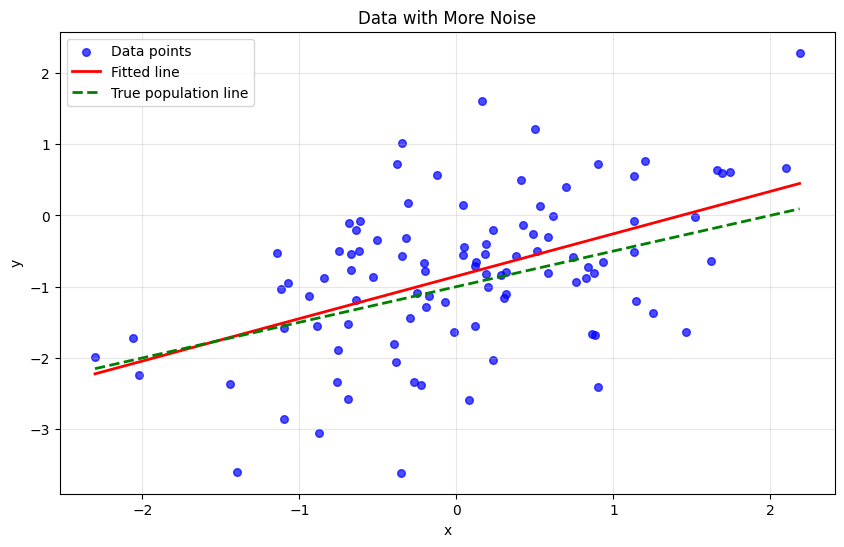

You can do this by increasing the variance of the normal distribution used to generate the error term ε.


In [14]:
# Visualize comparison with more noise
plt.figure(figsize=(10, 6))
plt.scatter(x_more_noise, y_more_noise, alpha=0.7, color='blue', s=30, label='Data points')

x_range = np.linspace(x_more_noise.min(), x_more_noise.max(), 100)
y_fitted_more = model_linear_more.predict(x_range.reshape(-1, 1))
y_true_line = -1 + 0.5 * x_range

plt.plot(x_range, y_fitted_more, 'r-', linewidth=2, label='Fitted line')
plt.plot(x_range, y_true_line, 'g--', linewidth=2, label='True population line')

plt.title('Data with More Noise')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"You can do this by increasing the variance of the normal distribution used to generate the error term ε.")

### (j) Confidence intervals for β₀ and β₁

In [15]:
# (j) Calculate confidence intervals using statistical formulas
from scipy import stats

def calculate_confidence_intervals(X, y, model, confidence=0.95):
    """
    Calculate confidence intervals for regression coefficients
    """
    n = len(y)
    p = X.shape[1] + 1  # number of parameters (including intercept)
    
    # Predictions and residuals
    y_pred = model.predict(X)
    residuals = y - y_pred
    
    # Mean squared error
    mse = np.sum(residuals**2) / (n - p)
    
    # Design matrix (add column of ones for intercept)
    X_design = np.column_stack([np.ones(n), X.ravel()])
    
    # Covariance matrix
    cov_matrix = mse * np.linalg.inv(X_design.T @ X_design)
    
    # Standard errors
    se = np.sqrt(np.diag(cov_matrix))
    
    # t-statistic for confidence interval
    alpha = 1 - confidence
    t_val = stats.t.ppf(1 - alpha/2, n - p)
    
    # Coefficients
    coeffs = [model.intercept_, model.coef_[0]]
    
    # Confidence intervals
    ci_lower = [coeff - t_val * se_i for coeff, se_i in zip(coeffs, se)]
    ci_upper = [coeff + t_val * se_i for coeff, se_i in zip(coeffs, se)]
    
    return coeffs, ci_lower, ci_upper, se

# Calculate confidence intervals for all three datasets
datasets = [
    (X, y, model_linear, "Original Data"),
    (X_less_noise, y_less_noise, model_linear_less, "Less Noisy Data"), 
    (X_more_noise, y_more_noise, model_linear_more, "More Noisy Data")
]

print("95% Confidence Intervals for β₀ and β₁:")
print("=" * 60)
print(f"True values: β₀ = -1.0000, β₁ = 0.5000")
print("="*60)

for X_data, y_data, model, name in datasets:
    coeffs, ci_lower, ci_upper, se = calculate_confidence_intervals(X_data, y_data, model)
    
    print(f"\n{name}:")
    print(f"β₀: {coeffs[0]:.4f} [{ci_lower[0]:.4f}, {ci_upper[0]:.4f}] (SE: {se[0]:.4f})")
    print(f"β₁: {coeffs[1]:.4f} [{ci_lower[1]:.4f}, {ci_upper[1]:.4f}] (SE: {se[1]:.4f})")
    
    # Check if true values are in confidence intervals
    beta0_in_ci = ci_lower[0] <= -1.0 <= ci_upper[0]
    beta1_in_ci = ci_lower[1] <= 0.5 <= ci_upper[1]
    print(f"True β₀ in CI: {beta0_in_ci}, True β₁ in CI: {beta1_in_ci}")

95% Confidence Intervals for β₀ and β₁:
True values: β₀ = -1.0000, β₁ = 0.5000

Original Data:
β₀: -0.9265 [-1.0197, -0.8332] (SE: 0.0470)
β₁: 0.5477 [0.4426, 0.6528] (SE: 0.0530)
True β₀ in CI: True, True β₁ in CI: True

Less Noisy Data:
β₀: -0.9853 [-1.0039, -0.9666] (SE: 0.0094)
β₁: 0.5095 [0.4885, 0.5306] (SE: 0.0106)
True β₀ in CI: True, True β₁ in CI: True

More Noisy Data:
β₀: -0.8530 [-1.0395, -0.6665] (SE: 0.0940)
β₁: 0.5954 [0.3852, 0.8056] (SE: 0.1059)
True β₀ in CI: True, True β₁ in CI: True


## Summary and Results Discussion

In [16]:
# Summary of results
print("EXERCISE SUMMARY")
print("=" * 50)
print(f"True model: Y = -1 + 0.5X + ε")
print("\nKey Findings:")
print("1. Least squares regression provides good estimates of the true parameters")
print("2. Adding a quadratic term doesn't improve the linear model (as expected)")
print("3. Less noise → more accurate parameter estimates and narrower confidence intervals")
print("4. More noise → less accurate parameter estimates and wider confidence intervals")
print("5. The confidence intervals generally contain the true parameter values")

# Calculate R² for comparison
r2_original = r2_score(y, model_linear.predict(X))
r2_less_noise = r2_score(y_less_noise, model_linear_less.predict(X_less_noise))
r2_more_noise = r2_score(y_more_noise, model_linear_more.predict(X_more_noise))

print(f"\nR² Values:")
print(f"Original data: {r2_original:.4f}")
print(f"Less noisy data: {r2_less_noise:.4f}")
print(f"More noisy data: {r2_more_noise:.4f}")
print("\nAs expected, R² increases with less noise and decreases with more noise.")

EXERCISE SUMMARY
True model: Y = -1 + 0.5X + ε

Key Findings:
1. Least squares regression provides good estimates of the true parameters
2. Adding a quadratic term doesn't improve the linear model (as expected)
3. Less noise → more accurate parameter estimates and narrower confidence intervals
4. More noise → less accurate parameter estimates and wider confidence intervals
5. The confidence intervals generally contain the true parameter values

R² Values:
Original data: 0.5218
Less noisy data: 0.9594
More noisy data: 0.2438

As expected, R² increases with less noise and decreases with more noise.
